In [1]:
from os import listdir

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import optimize

In [2]:
#This notebook calls functions in the frap.py module
from frap import *

# Load data

In [3]:
# Load locally
publication_data = pd.read_pickle("./data/EML4-ALK_1fps_publication_data_df.pkl")

In [4]:
ALKv1 = publication_data[publication_data.Protein.eq('ALKv1')]

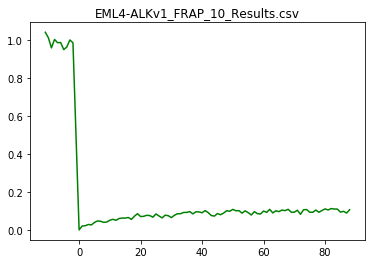

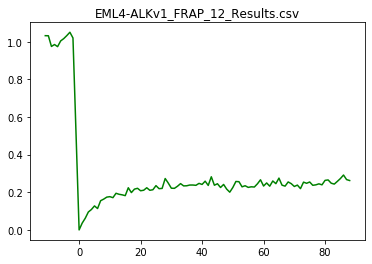

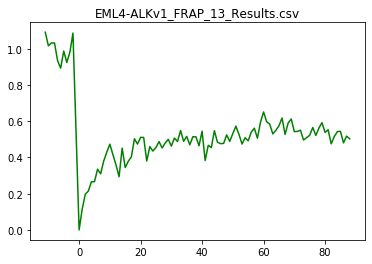

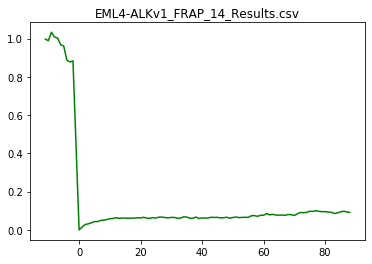

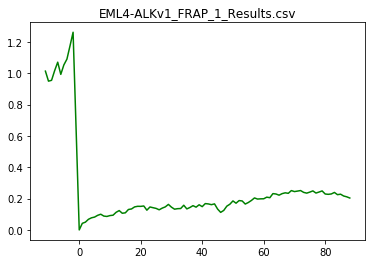

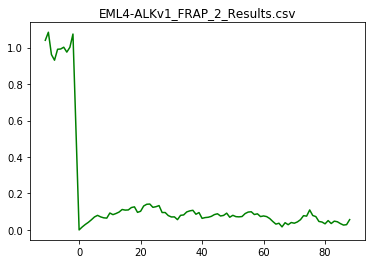

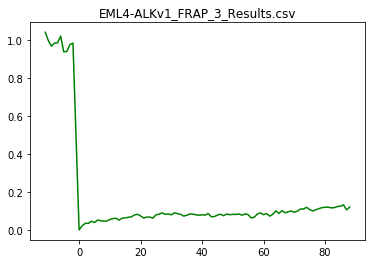

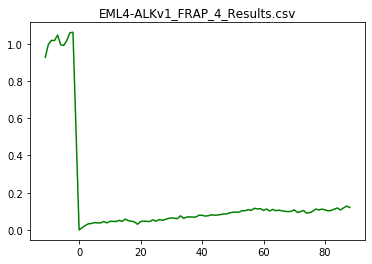

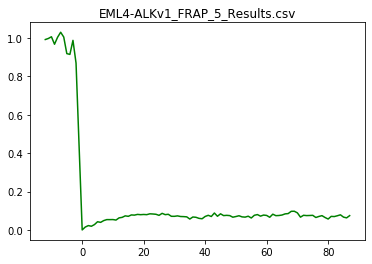

In [ ]:
# Normalise to 0-1 range
ROI = 'Mean(Focus)'

for f in ALKv1.File.unique():
    
    file_data = ALKv1[ALKv1.File.eq(f)]

    title = file_data.Filename.values[0]
    t0    = file_data['Bleach Frame'].values[0]
    
    df    = four_column(file_data)
    sub   = subtract_background(df)
    norm  = normalise(sub)
    FRAP  = get_FRAP(norm, t0)

    #Drop prebleach frame
    prebleachframe = FRAP[FRAP['Time']==-1].index.values
    FRAP.drop(index=prebleachframe, inplace=True)
    
    x = FRAP.Time
    y = FRAP[ROI]
    
    #Normalise to 0-1 range
    y = 1 / (1-y.loc[int(prebleachframe)+1])*(y-1)+1

    plt.plot(x, y, c='g');
    plt.title(title);
    plt.show()

In [ ]:
# Normalise to 0-1 range
ROI = 'Mean(Focus)'

for f in ALKv1.File.unique():
    
    file_data = ALKv1[ALKv1.File.eq(f)]

    title = file_data.Filename.values[0]
    t0    = file_data['Bleach Frame'].values[0]
    
    df    = four_column(file_data)
    sub   = subtract_background(df)
    norm  = normalise(sub)
    FRAP  = get_FRAP(norm, t0)

    #Drop prebleach frame
    prebleachframe = FRAP[FRAP['Time']==-1].index.values
    FRAP.drop(index=prebleachframe, inplace=True)
    
    x = FRAP.Time
    y = FRAP[ROI]
    
    #Normalise to 0-1 range
    y = 1 / (1-y.loc[int(prebleachframe)+1])*(y-1)+1

    plt.plot(x, y, c='g', alpha=0.2);
    plt.title('ALKv1');
    plt.xlabel('Time (s)');
    plt.ylabel('Fluorescence Intensity (AU)');
    plt.ylim(0,1.2);
    
    plt.savefig('figures/ALKv1_80s_0-1.pdf', format='pdf')

In [ ]:
ALKv3 = publication_data[publication_data.Protein.eq('ALKv3')]

In [ ]:
# Normalise to 0-1 range
ROI = 'Mean(Focus)'

for f in ALKv3.File.unique():
    
    file_data = ALKv3[ALKv3.File.eq(f)]

    title = file_data.Filename.values[0]
    t0    = file_data['Bleach Frame'].values[0]
    
    df    = four_column(file_data)
    sub   = subtract_background(df)
    norm  = normalise(sub)
    FRAP  = get_FRAP(norm, t0)

    #Drop prebleach frame
    prebleachframe = FRAP[FRAP['Time']==-1].index.values
    FRAP.drop(index=prebleachframe, inplace=True)
    
    x = FRAP.Time
    y = FRAP[ROI]
    
    #Normalise to 0-1 range
    y = 1 / (1-y.loc[int(prebleachframe)+1])*(y-1)+1

    plt.plot(x, y, c='dimgrey');
    plt.title(title);
    plt.show()

In [ ]:
# Normalise to 0-1 range
ROI = 'Mean(Focus)'

for f in ALKv3.File.unique():
    
    file_data = ALKv3[ALKv3.File.eq(f)]

    title = file_data.Filename.values[0]
    t0    = file_data['Bleach Frame'].values[0]
    
    df    = four_column(file_data)
    sub   = subtract_background(df)
    norm  = normalise(sub)
    FRAP  = get_FRAP(norm, t0)

    #Drop prebleach frame
    prebleachframe = FRAP[FRAP['Time']==-1].index.values
    FRAP.drop(index=prebleachframe, inplace=True)
    
    x = FRAP.Time
    y = FRAP[ROI]
    
    #Normalise to 0-1 range
    y = 1 / (1-y.loc[int(prebleachframe)+1])*(y-1)+1

    plt.plot(x, y, c='dimgrey', alpha=0.2);
    plt.title('ALKv3');
    plt.xlabel('Time (s)');
    plt.ylabel('Fluorescence Intensity (AU)');
    plt.ylim(0, 1.2);
    
    plt.savefig('figures/ALKv3_80s_0-1.pdf', format='pdf')

# Fit FRAP curves

In [ ]:
fit_list   = list()
thalf_list = list()
M_list     = list()

#Initialize
A= 0.7
c= 0.6
h= 0.5

p0 = [A, c, h]
bounds = (0.1, 0.1, 0), (1, 90, 1)

for f in publication_data.File.unique():
    
    file_data = publication_data[publication_data.File.eq(f)]
    
    title = file_data.Filename.values[0]
    t0    = file_data['Bleach Frame'].values[0]
    
    df    = four_column(file_data)
    sub   = subtract_background(df)
    norm  = normalise(sub)
    FRAP  = get_FRAP(norm, t0)

    #Drop prebleach frame
    prebleachframe = FRAP[FRAP['Time']==-1].index.values
    
    x = FRAP.Time
    y = FRAP[ROI]
    
    
    #Drop prebleach frames
    prebleachframe = int(FRAP[FRAP['Time']==-1].index.values)
    postbleach_FRAP = FRAP.loc[int(prebleachframe+1):].copy()
       
    x = np.array(postbleach_FRAP.Time)   
    y0 = np.array(postbleach_FRAP[ROI])

    y1, p1, e1 = fit_exp(x, y0, p0, bounds)
    
#     thalf = get_thalf(x, y1)
    
    M = get_mobile_from_fit(y1)

    fit_list.append(y1)
#     thalf_list.append(thalf)
    M_list.append(M)

In [ ]:
# Shape results into DataFrame

In [ ]:
Mobile = pd.DataFrame()
Mobile['File'] = publication_data.File.unique()
Mobile['M']    = M_list

In [ ]:
Results = publication_data[['File', 'Filename', 'Experiment', 'Protein']].copy()
Results['Duplicate'] = Results.duplicated()
Results = Results[Results.Duplicate == False]
Results.reset_index(drop=True, inplace=True)

# Merge with other data
Results = Results.merge(Mobile, on='File')

In [ ]:
Results.groupby('Protein').count()

In [ ]:
## Plot all ALKv1 and ALKv3 traces
colors = ["forestgreen", "dimgrey"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.boxplot('Protein', 'M', data=Results.groupby(by='Protein').mean().reset_index(), width=0.3)
sns.swarmplot('Protein', 'M', data=Results)
sns.despine()
plt.ylim(0,1);
plt.ylabel('Mobile Fraction');

plt.savefig('figures/EML4-ALK_80s_Mobile_Fractions_Swarm.pdf', format='pdf')

In [ ]:
## Plot all ALKv1 and ALKv3 traces
colors = ["forestgreen", "dimgrey"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.boxplot('Protein', 'M', data=Results.groupby(by='Protein').mean().reset_index(), width=0.3)
sns.stripplot('Protein', 'M', data=Results)
sns.despine()
plt.ylim(0,1);
plt.ylabel('Mobile Fraction');

# The line below will overwrite the figure with points in new random positions.
plt.savefig('figures/EML4-ALK_80s_Mobile_Fractions_Strip.pdf', format='pdf')